# Age Influence Analysis

In [1]:
####Import libraries
# SQL
import sqlite3
# Data Manipulation
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno   #NaNs
#Nice Tables
from ipy_table import *

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#load data (make sure you have downloaded database.sqlite)
with sqlite3.connect(r'C:/Python/Soccer_draft/database.sqlite') as con:
    country_df = pd.read_sql_query("SELECT * from Country", con)
    matches_df = pd.read_sql_query("SELECT * from Match", con)
    league_df = pd.read_sql_query("SELECT * from League", con)
    team_df = pd.read_sql_query("SELECT * from Team", con)
    player_df = pd.read_sql_query("select * from Player", con)
    player_stats_df = pd.read_sql_query("select * from player_attributes", con)

#load past results
super_table=[["Name", 'Regression function', "Train Acc", 'Validation Acc', "r2_score", "conf_matrix", 'Cross-Valid.'],]
df_load = pd.read_csv(r'C:/Python/Soccer/out/results_table.csv')
for row in df_load.values.tolist():
    super_table.append(row)

In [3]:
all_df = [country_df, matches_df, league_df, team_df, player_df]
country_df.dfname = 'country_df'
matches_df.dfname = 'matches_df'
league_df.dfname = 'league_df' 
team_df.dfname = 'team_df' 
player_df.dfname = 'player_df'
player_stats_df.dfname = 'player_stats_df'

In [4]:
player_df.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [5]:
#Calculating Current Age of the players
from datetime import date, datetime

def calculate_age(row, birthday):
    today = date.today()
    birthday_date = row[birthday][:10]
    birthday_date = datetime.strptime(birthday_date, "%Y-%m-%d").date()
    return(today.year - birthday_date.year - ((today.month, today.day) < (birthday_date.month, birthday_date.day)))

In [6]:
player_df['Age'] = player_df.apply(lambda row: calculate_age(row, 'birthday'), axis=1)

In [7]:
player_df.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,Age
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,25


In [9]:
#Importing birth dates for players
player_vector = ['home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10',
       'away_player_11']

for player in player_vector:
    player_stat = pd.merge(matches_df, player_df, left_on = player, 
                                right_on = "player_api_id")
    matches_df[player+'_birthDate'] = player_stat['birthday'].copy()

In [10]:
matches_df.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_player_1_birthDate,home_player_2_birthDate,home_player_3_birthDate,home_player_4_birthDate,home_player_5_birthDate,home_player_6_birthDate,home_player_7_birthDate,home_player_8_birthDate,home_player_9_birthDate,home_player_10_birthDate,home_player_11_birthDate,away_player_1_birthDate,away_player_2_birthDate,away_player_3_birthDate,away_player_4_birthDate,away_player_5_birthDate,away_player_6_birthDate,away_player_7_birthDate,away_player_8_birthDate,away_player_9_birthDate,away_player_10_birthDate,away_player_11_birthDate
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.4,5.0,1.75,3.35,4.2,1.85,3.2,3.5,1.8,3.3,3.75,NaN,NaN,NaN,1.7,3.3,4.33,1.9,3.3,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2,1977-04-13 00:00:00,1983-06-24 00:00:00,1979-08-19 00:00:00,1981-05-18 00:00:00,1985-02-01 00:00:00,1980-12-04 00:00:00,1988-06-30 00:00:00,1983-07-12 00:00:00,1984-10-24 00:00:00,1979-02-03 00:00:00,1988-05-21 00:00:00,1978-02-28 00:00:00,1981-02-16 00:00:00,1984-11-02 00:00:00,1980-06-09 00:00:00,1983-07-01 00:00:00,1981-03-31 00:00:00,1981-03-14 00:00:00,1984-03-09 00:00:00,1990-04-05 00:00:00,1984-08-15 00:00:00,1988-05-09 00:00:00


In [31]:
matches_df.isnull().sum()

id                              0
country_id                      0
league_id                       0
season                          0
stage                           0
date                            0
match_api_id                    0
home_team_api_id                0
away_team_api_id                0
home_team_goal                  0
away_team_goal                  0
home_player_X1                  0
home_player_X2                  0
home_player_X3                  2
home_player_X4                  2
home_player_X5                  2
home_player_X6                  2
home_player_X7                  2
home_player_X8                  2
home_player_X9                  2
home_player_X10                 2
home_player_X11                 2
away_player_X1                  2
away_player_X2                  2
away_player_X3                  2
away_player_X4                  2
away_player_X5                  2
away_player_X6                  2
away_player_X7                  2
away_player_X8

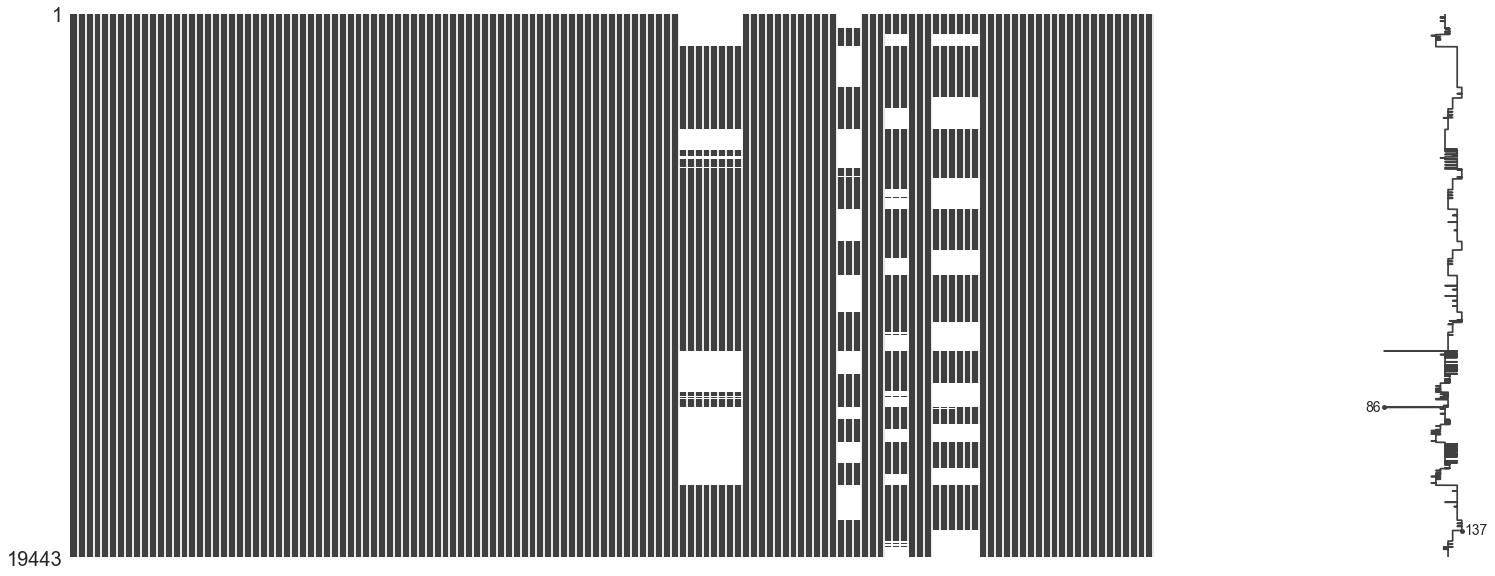

In [30]:
msno.matrix(matches_df)

In [24]:
matches_df.dropna(thresh=80, inplace=True)

In [27]:
matches_df.columns.values

array(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'aw

In [29]:
matches_df.dropna(subset = ['B365H', 'BWH', 'IWH', 'WHH', 'VCH', 'LBH', 'home_team_api_id', 'away_team_api_id',
        'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
        'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
        'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
        'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
        'away_player_8', 'away_player_9', 'away_player_10','away_player_11',
        'home_player_1', 'home_player_2','home_player_1_birthDate', 'home_player_2_birthDate',
       'home_player_3_birthDate', 'home_player_4_birthDate',
       'home_player_5_birthDate', 'home_player_6_birthDate',
       'home_player_7_birthDate', 'home_player_8_birthDate',
       'home_player_9_birthDate', 'home_player_10_birthDate',
       'home_player_11_birthDate', 'away_player_1_birthDate',
       'away_player_2_birthDate', 'away_player_3_birthDate',
       'away_player_4_birthDate', 'away_player_5_birthDate',
       'away_player_6_birthDate', 'away_player_7_birthDate',
       'away_player_8_birthDate', 'away_player_9_birthDate',
       'away_player_10_birthDate', 'away_player_11_birthDate'
                            ], how='any', inplace=True)

In [32]:
from datetime import date, datetime

def calculate_age(row, which_player):
    birthday_date = which_player + '_birthDate'
    birthday_date = datetime.strptime(row[birthday_date][:10], "%Y-%m-%d").date()
    match_date = datetime.strptime(row.date[:10], "%Y-%m-%d").date()
    return(match_date.year - birthday_date.year - ((match_date.month, match_date.day)
                                                   < (birthday_date.month, birthday_date.day)))

In [33]:
player_vector = ['home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10',
       'away_player_11']

for player in player_vector:
    matches_df[player+'_Age'] = matches_df.apply(lambda row: calculate_age(row, player), axis=1)

In [34]:
matches_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_player_1_birthDate,home_player_2_birthDate,home_player_3_birthDate,home_player_4_birthDate,home_player_5_birthDate,home_player_6_birthDate,home_player_7_birthDate,home_player_8_birthDate,home_player_9_birthDate,home_player_10_birthDate,home_player_11_birthDate,away_player_1_birthDate,away_player_2_birthDate,away_player_3_birthDate,away_player_4_birthDate,away_player_5_birthDate,away_player_6_birthDate,away_player_7_birthDate,away_player_8_birthDate,away_player_9_birthDate,away_player_10_birthDate,away_player_11_birthDate,home_player_1_Age,home_player_2_Age,home_player_3_Age,home_player_4_Age,home_player_5_Age,home_player_6_Age,home_player_7_Age,home_player_8_Age,home_player_9_Age,home_player_10_Age,home_player_11_Age,away_player_1_Age,away_player_2_Age,away_player_3_Age,away_player_4_Age,away_player_5_Age,away_player_6_Age,away_player_7_Age,away_player_8_Age,away_player_9_Age,away_player_10_Age,away_player_11_Age
145,146,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,9987,2,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,38327.0,67950.0,67958.0,67959.0,37112.0,36393.0,148286.0,67898.0,164352.0,38801.0,26502.0,37937.0,38293.0,148313.0,104411.0,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0,None,None,None,None,None,None,None,None,3.00,3.4,2.30,2.95,3.25,2.20,2.80,3.1,2.2,2.75,3.25,2.20,NaN,NaN,NaN,2.62,3.2,2.30,3.05,3.20,2.30,2.65,3.25,2.35,2.90,3.25,2.30,2.80,3.2,2.25,1981-04-07 00:00:00,1983-07-08 00:00:00,1983-01-01 00:00:00,1986-05-21 00:00:00,1985-11-22 00:00:00,1981-03-14 00:00:00,1988-02-26 00:00:00,1985-02-28 00:00:00,1985-08-18 00:00:00,1985-12-01 00:00:00,1985-07-03 00:00:00,1982-02-12 00:00:00,1983-07-08 00:00:00,1983-07-01 00:00:00,1978-08-03 00:00:00,1986-07-11 00:00:00,1978-02-25 00:00:00,1985-12-06 00:00:00,1982-04-06 00:00:00,1979-08-30 00:00:00,1986-04-28 00:00:00,1985-11-22 00:00:00,27,25,26,22,23,27,21,23,23,23,23,27,25,25,30,22,31,23,26,29,22,23
153,154,1,1,2008/2009,25,2009-03-08 00:00:00,493025,9984,8342,1,3,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,36835.0,37047.0,37021.0,37051.0,104386.0,32863.0,37957.0,37909.0,38357.0,37065.0,78462.0,37990.0,21812.0,11736.0,37858.0,38366.0,37983.0,39578.0,38336.0,52280.0,27423.0,38440.0,None,None,None,None,None,None,None,None,2.80,3.2,2.37,3.10,3.00,2.20,2.80,3.1,2.2,3.20,3.20,2.00,NaN,NaN,NaN,3.20,3.2,2.00,3.05,3.25,2.25,2.65,3.20,2.35,2.90,3.20,2.30,2.62,3.2,2.38,1981-04-07 00:00:00,1983-07-08 00:00:00,1982-01-05 00:00:00,198